In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.shape

(891, 15)

In [40]:
titanic.groupby(['sex','class'])['survived'].mean()

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [41]:
titanic.groupby(['sex','class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [47]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [48]:
titanic.pivot_table?

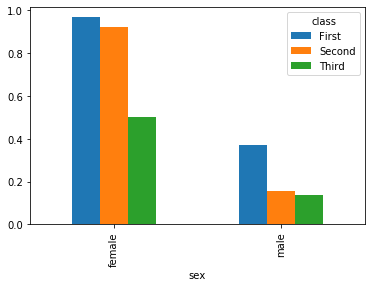

In [51]:
titanic.pivot_table('survived',index='sex',columns='class').plot(kind='bar')

In [52]:
age=pd.cut?

In [53]:
age=pd.cut(titanic['age'],[0,18,80])

In [61]:
titanic['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [62]:
titanic.pivot_table('survived',index=['sex',age],columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

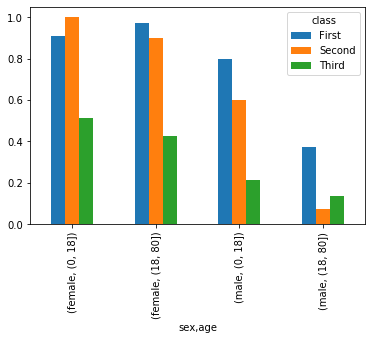

In [63]:
titanic.pivot_table('survived',index=['sex',age],columns='class').plot(kind='bar')

In [65]:
fare=pd.qcut(titanic['fare'],2)

In [66]:
fare.head()

0     (-0.001, 14.454]
1    (14.454, 512.329]
2     (-0.001, 14.454]
3    (14.454, 512.329]
4     (-0.001, 14.454]
Name: fare, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [68]:
titanic.pivot_table('survived',index=['sex',age],columns=[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

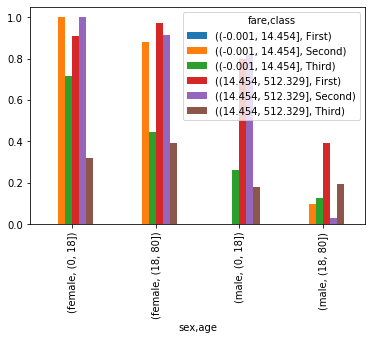

In [69]:
titanic.pivot_table('survived',index=['sex',age],columns=[fare,'class']).plot(kind='bar')

In [82]:
titanic.pivot_table(index='sex',columns='class',aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [83]:
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


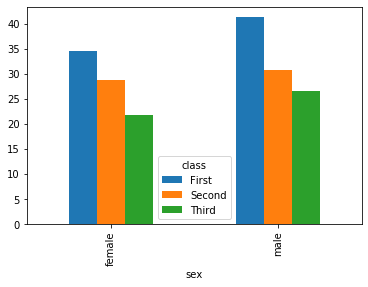

In [92]:
titanic.pivot_table('age',index='sex',columns='class').plot(kind='bar')

In [93]:
births=pd.read_csv('VSRR_-_State_and_National_Provisional_Counts_for_Live_Births__Deaths__and_Infant_Deaths.csv')

In [95]:
births

,State,Year,Month,Period,Indicator,Data Value
0,UNITED STATES,2018,January,Monthly,Number of Live Births,315000
1,UNITED STATES,2018,February,Monthly,Number of Live Births,284000
2,UNITED STATES,2018,March,Monthly,Number of Live Births,316000
3,UNITED STATES,2018,April,Monthly,Number of Live Births,298000
4,UNITED STATES,2018,May,Monthly,Number of Live Births,321000
...,...,...,...,...,...,...
1645,WASHINGTON,2019,March,Monthly,Number of Live Births,7272
1646,WEST VIRGINIA,2019,March,Monthly,Number of Live Births,1404
1647,WISCONSIN,2019,March,Monthly,Number of Live Births,5199
1648,WYOMING,2019,March,Monthly,Number of Live Births,552


In [97]:
births_2018=births[births['Year']==2018]

In [99]:
births_2018.pivot_table('Data Value',index='State',columns='Month')

Month,April,August,December,February,January,July,June,March,May,November,October,September
State,,,,,,,,,,,,
ALABAMA,4.408500e+03,4.783500e+03,4.915000e+03,4.430000e+03,5.309500e+03,4.629500e+03,4.499000e+03,4714.5,4.598500e+03,4621.0,4.703000e+03,4.509000e+03
ALASKA,6.140000e+02,6.690000e+02,6.040000e+02,5.500000e+02,6.030000e+02,5.965000e+02,6.010000e+02,628.0,6.080000e+02,584.5,6.270000e+02,5.755000e+02
ARIZONA,5.583500e+03,5.972000e+03,6.059000e+03,5.560500e+03,6.531500e+03,5.807500e+03,5.574500e+03,6038.5,5.596000e+03,5763.5,5.879000e+03,5.824000e+03
ARKANSAS,2.691000e+03,2.965500e+03,3.006500e+03,2.751000e+03,3.216500e+03,2.922000e+03,2.770000e+03,2902.0,2.939500e+03,2846.5,2.969500e+03,2.815000e+03
CALIFORNIA,2.869950e+04,3.109150e+04,3.057600e+04,2.851650e+04,3.330600e+04,3.039100e+04,2.876500e+04,31338.5,2.943750e+04,29959.0,3.027600e+04,2.967300e+04
COLORADO,4.141000e+03,4.413500e+03,4.183500e+03,3.969500e+03,4.433000e+03,4.280500e+03,4.023500e+03,4354.5,4.297000e+03,4123.5,4.269000e+03,4.222500e+03
CONNECTICUT,2.742500e+03,2.781000e+03,2.757000e+03,2.538000e+03,2.951500e+03,2.767000e+03,2.646500e+03,2822.5,2.812000e+03,2723.0,2.837500e+03,2.668000e+03
DELAWARE,8.120000e+02,8.705000e+02,8.495000e+02,7.955000e+02,8.745000e+02,8.075000e+02,8.290000e+02,889.0,8.215000e+02,823.0,8.365000e+02,7.910000e+02
DISTRICT OF COLUMBIA,5.615000e+02,6.225000e+02,5.775000e+02,5.500000e+02,6.385000e+02,5.980000e+02,5.925000e+02,585.5,5.955000e+02,585.0,6.360000e+02,5.755000e+02


In [105]:
births_2018_states=births_2018[births_2018['State']!='UNITED STATES']

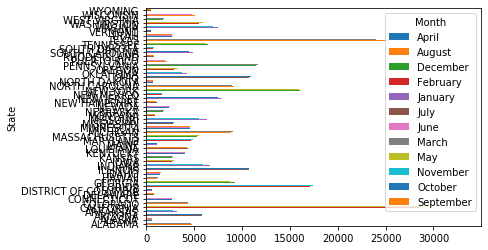

In [109]:
births_2018_states.pivot_table('Data Value',index='State',columns='Month').plot(kind='barh',figsize=(6, 4))

In [110]:
births_2018_states.pivot_table('Data Value',index='State',columns='Month',margins=True)

Month,April,August,December,February,January,July,June,March,May,November,October,September,All
State,,,,,,,,,,,,,
ALABAMA,4408.500000,4783.500,4915.000000,4430.000000,5309.500000,4629.500000,4499.000000,4714.500000,4598.500000,4621.000000,4703.000000,4509.000000,4676.750000
ALASKA,614.000000,669.000,604.000000,550.000000,603.000000,596.500000,601.000000,628.000000,608.000000,584.500000,627.000000,575.500000,605.041667
ARIZONA,5583.500000,5972.000,6059.000000,5560.500000,6531.500000,5807.500000,5574.500000,6038.500000,5596.000000,5763.500000,5879.000000,5824.000000,5849.125000
ARKANSAS,2691.000000,2965.500,3006.500000,2751.000000,3216.500000,2922.000000,2770.000000,2902.000000,2939.500000,2846.500000,2969.500000,2815.000000,2899.583333
CALIFORNIA,28699.500000,31091.500,30576.000000,28516.500000,33306.000000,30391.000000,28765.000000,31338.500000,29437.500000,29959.000000,30276.000000,29673.000000,30169.125000
COLORADO,4141.000000,4413.500,4183.500000,3969.500000,4433.000000,4280.500000,4023.500000,4354.500000,4297.000000,4123.500000,4269.000000,4222.500000,4225.916667
CONNECTICUT,2742.500000,2781.000,2757.000000,2538.000000,2951.500000,2767.000000,2646.500000,2822.500000,2812.000000,2723.000000,2837.500000,2668.000000,2753.875000
DELAWARE,812.000000,870.500,849.500000,795.500000,874.500000,807.500000,829.000000,889.000000,821.500000,823.000000,836.500000,791.000000,833.291667
DISTRICT OF COLUMBIA,561.500000,622.500,577.500000,550.000000,638.500000,598.000000,592.500000,585.500000,595.500000,585.000000,636.000000,575.500000,593.166667


In [124]:
births_2018_states.groupby('State').head()

,State,Year,Month,Period,Indicator,Data Value
90,ALABAMA,2018,January,Monthly,Number of Deaths,5683
91,ALASKA,2018,January,Monthly,Number of Deaths,392
92,ARIZONA,2018,January,Monthly,Number of Deaths,6320
93,ARKANSAS,2018,January,Monthly,Number of Deaths,3348
94,CALIFORNIA,2018,January,Monthly,Number of Deaths,28445
...,...,...,...,...,...,...
345,WASHINGTON,2018,May,Monthly,Number of Deaths,4590
346,WEST VIRGINIA,2018,May,Monthly,Number of Deaths,1941
347,WISCONSIN,2018,May,Monthly,Number of Deaths,4383
348,WYOMING,2018,May,Monthly,Number of Deaths,400


In [130]:
births_2018_states['Indicator']

90           Number of Deaths
91           Number of Deaths
92           Number of Deaths
93           Number of Deaths
94           Number of Deaths
                ...          
1489    Number of Live Births
1490    Number of Live Births
1491    Number of Live Births
1492    Number of Live Births
1493    Number of Live Births
Name: Indicator, Length: 1248, dtype: object

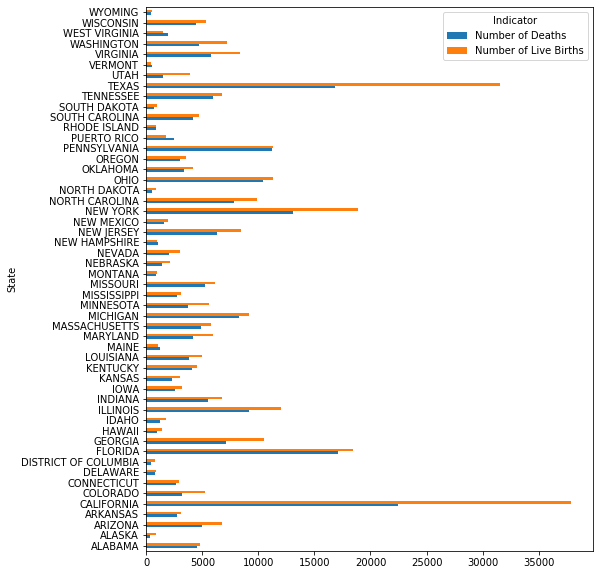

In [138]:
births_2018_states.pivot_table('Data Value',columns='Indicator',index='State',).plot(figsize=(8,10),kind='barh')

In [139]:
sns.set()

Text(0, 0.5, 'total birth per year')

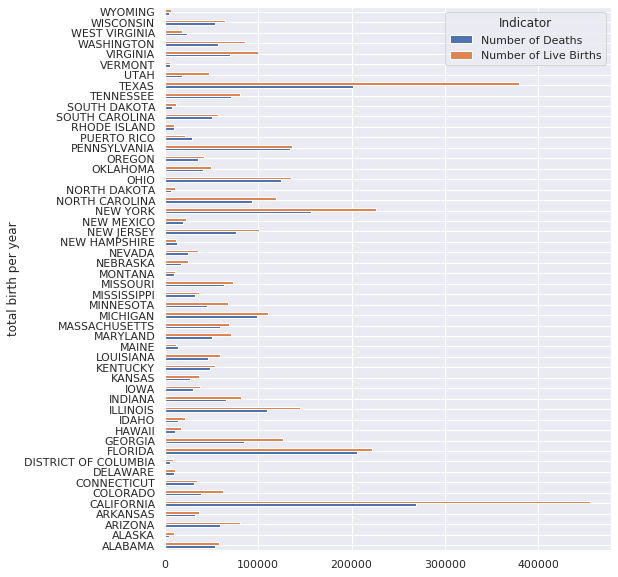

In [144]:
births_2018_states.pivot_table('Data Value',columns='Indicator',index='State',aggfunc='sum').plot(kind='barh',figsize=(8,10))
plt.ylabel('total birth per year')

In [145]:
plt.subplot?

In [146]:
births_2018_states.groupby('Month').head()

,State,Year,Month,Period,Indicator,Data Value
90,ALABAMA,2018,January,Monthly,Number of Deaths,5683
91,ALASKA,2018,January,Monthly,Number of Deaths,392
92,ARIZONA,2018,January,Monthly,Number of Deaths,6320
93,ARKANSAS,2018,January,Monthly,Number of Deaths,3348
94,CALIFORNIA,2018,January,Monthly,Number of Deaths,28445
142,ALABAMA,2018,February,Monthly,Number of Deaths,4522
143,ALASKA,2018,February,Monthly,Number of Deaths,343
144,ARIZONA,2018,February,Monthly,Number of Deaths,4924
145,ARKANSAS,2018,February,Monthly,Number of Deaths,2705
146,CALIFORNIA,2018,February,Monthly,Number of Deaths,22568


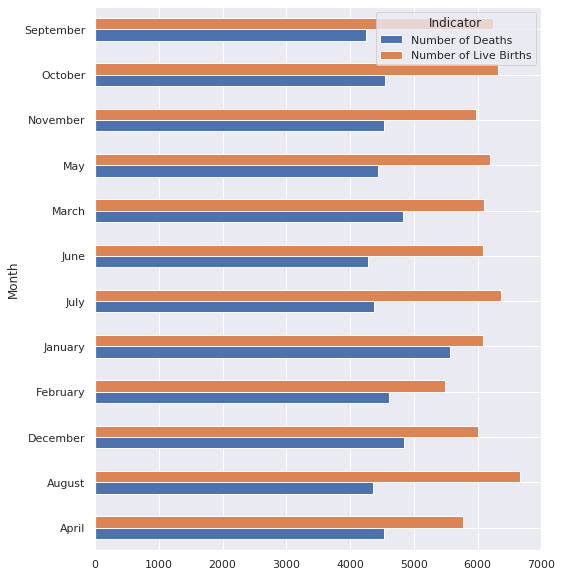

In [147]:
births_2018_states.pivot_table('Data Value',columns='Indicator',index='Month',).plot(figsize=(8,10),kind='barh')